In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
columns = ['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'target']
data_iris = pd.read_csv('iris.data', names = columns)

In [3]:
data_iris.head(10)

,sepal_l,sepal_w,petal_l,petal_w,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
columns = ["target", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols",
           "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity",
           "Hue", "OD280/OD315", "Proline"]
data_wine = pd.read_csv('wine.data', names = columns)
data_wine['target'] = data_wine['target'].map({1: "a", 2: "b", 3: "c"})
data_wine = data_wine[['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 
            'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
            'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315', 
                       'Proline', 'target']]


In [5]:
data_wine.head(10)

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,a
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,a
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,a
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,a
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,a
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,a
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,a
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,a
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,a
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,a


In [6]:
def EqualDiscret(n_part, name_atr, data):
    
    def transf(x):
        min1 = data[name_atr].min()
        max1 = data[name_atr].max()
        return (x - min1) // ((max1 - min1) / n_part) if x < max1 else (n_part - 1)
    
    data[name_atr] = data[name_atr].transform(transf)

In [7]:
csm_data = pd.read_excel('CSM.xlsx')
csm_data = csm_data.rename(columns={"Ratings": "target"})
csm_data = csm_data[["Genre", "Gross", "Budget", "Screens", "Sequel", "Sentiment", "Views", "Likes", "Dislikes", 
                     "Comments", "Aggregate Followers", "target"]]

In [8]:
EqualDiscret(4, "target", csm_data)

In [9]:
csm_data.head(10)

,Genre,Gross,Budget,Screens,Sequel,Sentiment,Views,Likes,Dislikes,Comments,Aggregate Followers,target
0,8,9130,4000000.0,45.0,1,0,3280543,4632,425,636,1120000.0,2.0
1,1,192000000,50000000.0,3306.0,2,2,583289,3465,61,186,12350000.0,2.0
2,1,30700000,28000000.0,2872.0,1,0,304861,328,34,47,483000.0,2.0
3,1,106000000,110000000.0,3470.0,2,0,452917,2429,132,590,568000.0,2.0
4,8,17300000,3500000.0,2310.0,2,0,3145573,12163,610,1082,1923800.0,1.0
5,3,29000,500000.0,NaN,1,0,91137,112,7,1,310000.0,1.0
6,8,42600000,40000000.0,3158.0,1,0,3013011,9595,419,1020,8153000.0,2.0
7,1,5750000,20000000.0,818.0,1,2,1854103,2207,197,593,130655.0,2.0
8,10,26000000,28000000.0,2714.0,1,3,2213659,2210,419,382,125646.0,2.0
9,8,48600000,12500000.0,2253.0,1,0,5218079,11709,532,770,21697300.0,2.0


In [10]:
def fill_empty(df, name):
    df[name].fillna(df[name].median(), inplace=True)
    return df

In [11]:
csm_data = fill_empty(csm_data, "Screens")
csm_data = fill_empty(csm_data, "Budget")
csm_data = fill_empty(csm_data, "Aggregate Followers")
csm_data.isnull().sum()

Genre                  0
Gross                  0
Budget                 0
Screens                0
Sequel                 0
Sentiment              0
Views                  0
Likes                  0
Dislikes               0
Comments               0
Aggregate Followers    0
target                 0
dtype: int64

In [12]:
data_wdbc = pd.read_csv("wdbc.data", usecols=range(12), names=['id', 
'target', 'radius', 'texture', 'perimeter', 'area', 'smoothness', 
'compactness', 'concavity', 'points', 'symmetry', 'dimension'])

data_wdbc = data_wdbc[['radius', 'texture', 'perimeter', 'area', 'smoothness', 
    'compactness', 'concavity', 'points', 'symmetry', 'dimension', 
    'target']]

data_wdbc.head(10)

,radius,texture,perimeter,area,smoothness,compactness,concavity,points,symmetry,dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,M
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,M
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,M
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,M
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,M
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,M


In [13]:
class NaiveBayes(): 
    def gaussian_density(self, index, x):
        numerator = np.exp((-1/2)*((x - self.mean[index])**2) / (2 * self.var[index]))
            
        denominator = np.sqrt(2 * np.pi * self.var[index])
        prob = numerator / denominator
        return prob
 
    def posterior(self, x):
        poster = []
        
        for i in range(len(self.classes)):
            
            posterior = np.log(self.prior[i]) + np.sum(np.log(self.gaussian_density(i, x)))
            poster.append(posterior)
            
        return self.classes[np.argmax(poster)]
 
    def fit(self, features, target):
        
        self.classes = np.unique(target)
 
        self.mean = features.groupby(target).apply(np.mean).to_numpy()
        
        self.var = features.groupby(target).apply(np.var).to_numpy() 
        
        self.prior = (features.groupby(target).apply(lambda x: len(x)) / features.shape[0]).to_numpy()
 
    def pred(self, features):
        preds = [self.posterior(feature) for feature in features.to_numpy()]
        return preds
    
    def accuracy(self, y_test, y_pred):
        accuracy = np.sum(y_test == y_pred) / len(y_test)
        return accuracy

    def visualize(self, dataframe, title):
        accuracy_predicts = []
        
        for train_percentage in [50, 60, 70, 80, 90]:
            
            dataframe_train, dataframe_test = train_test_split(dataframe, test_size=(1 - train_percentage / 100), 
            shuffle = True)
            
            X_dataframe_train = dataframe_train.drop('target', axis=1)
            y_dataframe_train = dataframe_train['target']
            X_dataframe_test = dataframe_test.drop('target', axis=1)
            y_dataframe_test = dataframe_test['target']
            
            self.fit(X_dataframe_train, y_dataframe_train)
            predict = self.pred(X_dataframe_test)
            
            accuracy = self.accuracy(y_dataframe_test, predict)
            accuracy_predicts.append(accuracy)
 
        train_percentage = [50, 60, 70, 80, 90]
        plt.plot(train_percentage, accuracy_predicts)
        plt.xlabel('Train %')
        plt.ylabel('Accuracy')
        plt.title(title)
        plt.grid()
        plt.show()

C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

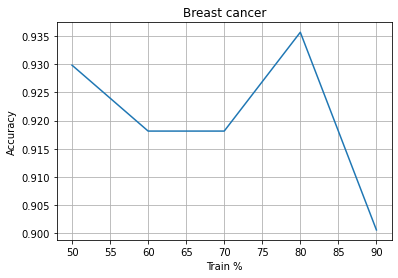

In [14]:
result = []
for train_percentage in [50, 60, 70, 80, 90]:
    wdbc_train, wdbc_test = train_test_split(data_wdbc, test_size=0.3, shuffle = True)
    
    X_wdbc_train = wdbc_train.drop('target', axis=1)
    y_wdbc_train = wdbc_train['target']
    
    wdbc_naive_bayes_model = NaiveBayes()
    wdbc_naive_bayes_model.fit(X_wdbc_train, y_wdbc_train)
    
    X_wdbc_test = wdbc_test.drop('target', axis=1)
    y_wdbc_test = wdbc_test['target']
    
    predictions = wdbc_naive_bayes_model.pred(X_wdbc_test)
    result.append(wdbc_naive_bayes_model.accuracy(y_wdbc_test, predictions))
train_percentage = [50, 60, 70, 80, 90]
plt.plot(train_percentage, result)
plt.xlabel('Train %')
plt.ylabel('Accuracy')
plt.title('Breast cancer')
plt.grid()
plt.show()


C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

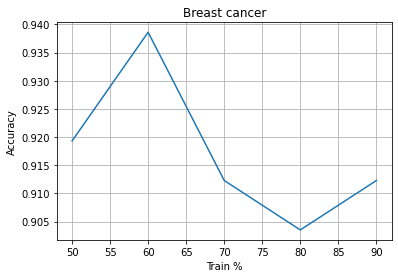

In [15]:
breast_cancer = NaiveBayes()
breast_cancer.visualize(data_wdbc, 'Breast cancer')

C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

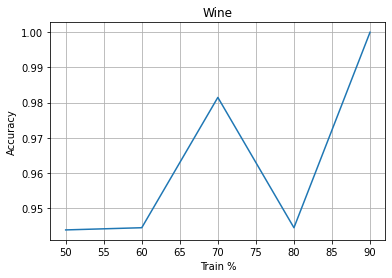

In [16]:
breast_cancer = NaiveBayes()
breast_cancer.visualize(data_wine, 'Wine')

C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

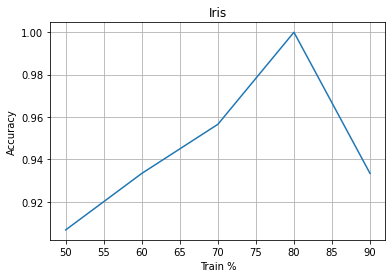

In [17]:
breast_cancer = NaiveBayes()
breast_cancer.visualize(data_iris, 'Iris')

C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\da4nik\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dty

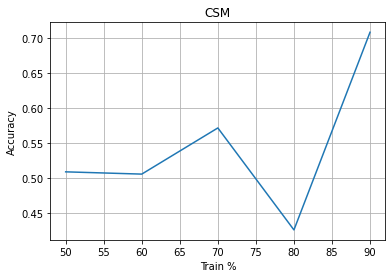

In [20]:
CSM = NaiveBayes()
CSM.visualize(csm_data, 'CSM')